For this project we will be exploring publicly available data from LendingClub.com. Lending Club connects people who need money (borrowers) with people who have money (investors). Hopefully, as an investor you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower paid back their loan in full. The data set has already been cleaned of NA values.

Here are what the columns represent:

1. credit.policy: 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.
2. purpose: The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").
3. int.rate: The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.
4. installment: The monthly installments owed by the borrower if the loan is funded.
5. log.annual.inc: The natural log of the self-reported annual income of the borrower.
6. dti: The debt-to-income ratio of the borrower (amount of debt divided by annual income).
7. fico: The FICO credit score of the borrower.
8. days.with.cr.line: The number of days the borrower has had a credit line.
9. revol.bal: The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle).
10. revol.util: The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available).
11. inq.last.6mths: The borrower's number of inquiries by creditors in the last 6 months.
12. delinq.2yrs: The number of times the borrower had been 30+ days past due on a payment in the past 2 years.
13. pub.rec: The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments).

# Importing The Libraries

In [84]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn-dark")

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report
from sklearn.ensemble import RandomForestClassifier

import warnings 
warnings.filterwarnings("ignore")


# Data Gathering

In [2]:
df = pd.read_csv("loan_data.csv")

In [4]:
df.head(5)

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [28]:
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [83]:
df.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

# Data Analysis and Visualization

Text(0.5, 1.0, 'How many people paid the loan')

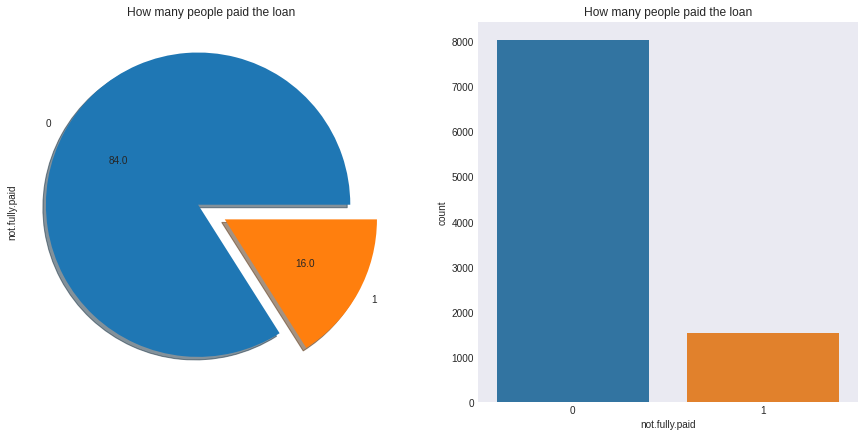

In [18]:
fig, ax = plt.subplots(1,2,figsize=(15,7))

df['not.fully.paid'].value_counts().plot.pie(ax=ax[0],explode=[0.1,0.1], autopct="%1.1f",shadow=True)
ax[0].set_title("How many people paid the loan")

sns.countplot(df['not.fully.paid'],ax=ax[1])
ax[1].set_title("How many people paid the loan")


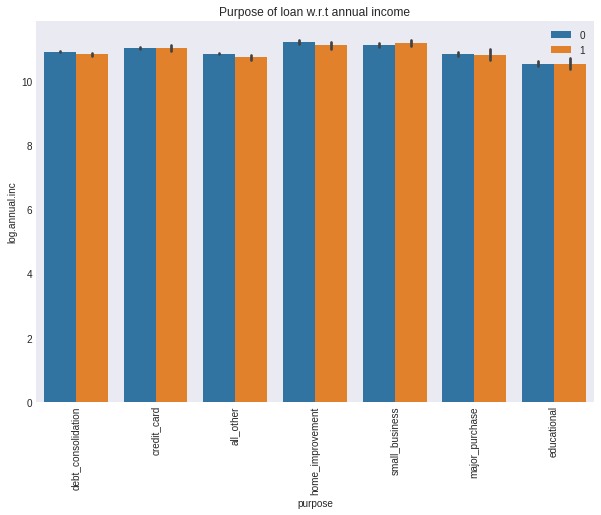

In [32]:
plt.figure(figsize=(10,7))
sns.barplot(df['purpose'], df['log.annual.inc'], hue=df['not.fully.paid'])
plt.xticks(rotation=90)
plt.title("Purpose of loan w.r.t annual income")
plt.legend(bbox_to_anchor=(1,1))

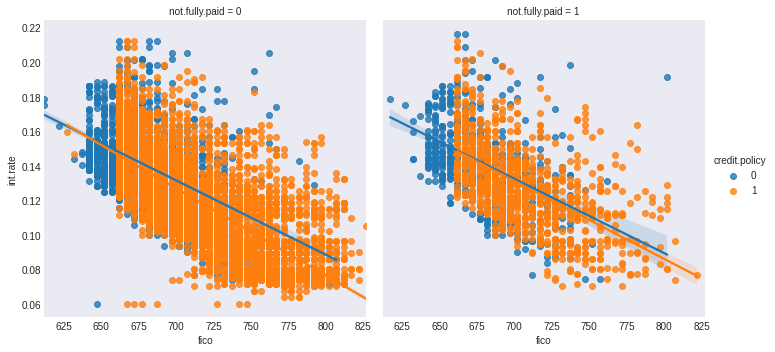

In [30]:
sns.lmplot(data=df, x="fico", y="int.rate",hue="credit.policy", col="not.fully.paid")

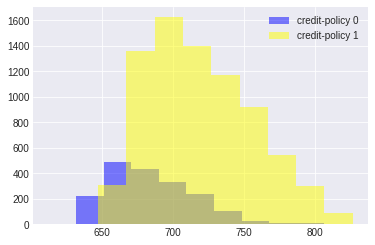

In [38]:
df[df['credit.policy'] == 0]['fico'].hist(alpha=0.5, color="blue",label="credit-policy 0")
df[df['credit.policy'] == 1]['fico'].hist(alpha=0.5,color="yellow",label='credit-policy 1')
plt.legend()

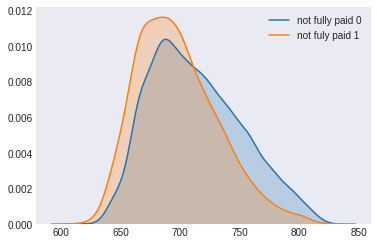

In [44]:
sns.kdeplot(df[df['not.fully.paid']==0].fico, shade=True,label="not fully paid 0")
sns.kdeplot(df[df['not.fully.paid']==1].fico,shade=True,label="not fuly paid 1")
plt.legend()

Text(0.5, 1.0, 'Bar-Chart of purposes')

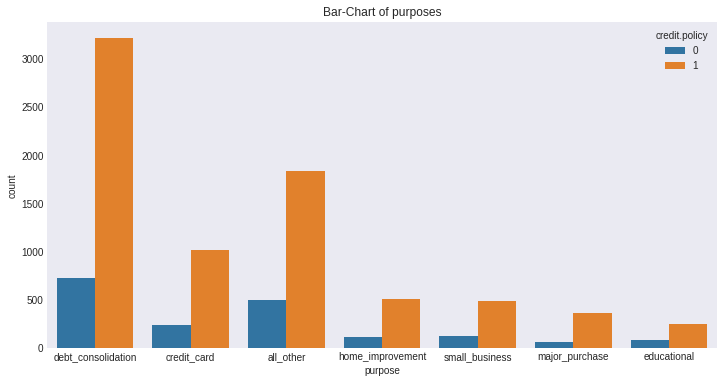

In [55]:
plt.figure(figsize=(12,6))
sns.countplot(df['purpose'], hue=df['credit.policy'])
plt.title('Bar-Chart of purposes')

In [57]:

final_df = pd.get_dummies(df,columns=['purpose'])

In [59]:
final_df.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


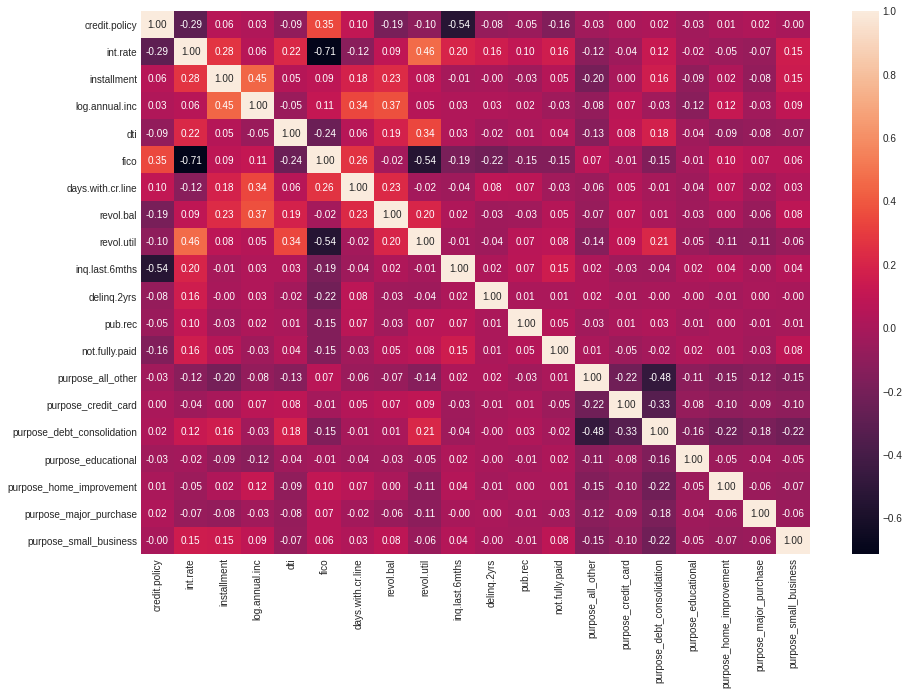

In [61]:
plt.figure(figsize=(15,10))
sns.heatmap(final_df.corr(),annot=True, fmt="0.2f")

# Spliting The Data

In [63]:
x_train, x_test, y_train,y_test = train_test_split(final_df.drop(['not.fully.paid'],axis=1), final_df['not.fully.paid'], test_size=0.2, random_state=0)

# Model Building

In [87]:
rfc = RandomForestClassifier()
acc = cross_val_score(rfc, x_train, y_train, scoring="accuracy")
acc

array([0.83757339, 0.83300718, 0.8426893 , 0.83550914, 0.84007833])

In [88]:
rfc.fit(x_train,y_train)
y_pred=rfc.predict(x_test)


# Checking the Model Accuracy

In [89]:
print("The accuracy of this model is {}".format(accuracy_score(y_test, y_pred)))
print(classification_report(y_pred, y_test))

The accuracy of this model is 0.843945720250522
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1906
           1       0.02      0.60      0.04        10

    accuracy                           0.84      1916
   macro avg       0.51      0.72      0.48      1916
weighted avg       0.99      0.84      0.91      1916



Text(0.5, 1.0, 'Accuracy of Model')

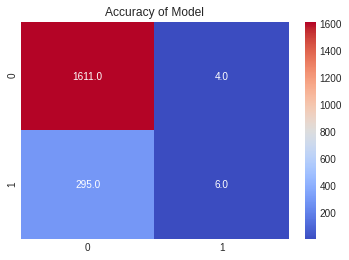

In [118]:

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,fmt="0.1f",cmap="coolwarm")
plt.title("Accuracy of Model")

# Hyper-Parameter Optimization

In [96]:
from sklearn.model_selection import RandomizedSearchCV
n_estimators = [10, 25, 50, 75, 100,1000]
max_depth = [3, None]
max_features = [1, 3, 5, 7]
min_samples_split = [2, 4, 6, 8, 10]
min_samples_leaf = [2, 4, 6, 8, 10]

hyperparams = {'n_estimators': n_estimators, 'max_depth': max_depth, 'max_features': max_features,
               'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}

rd = RandomizedSearchCV(estimator= RandomForestClassifier(),param_distributions=hyperparams,cv=5,scoring="accuracy",verbose=True)
#gd=GridSearchCV(estimator = rfr, param_grid = hyperparams, 
#                verbose=True, cv=5, scoring = "accuracy")

rd.fit(x_train, y_train)
print(rd.best_score_)
print(rd.best_estimator_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  3.9min finished


0.8394678261876658
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=5,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=8, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


Now We try to further optimize the model by Adjusting the features

# Feature-Selection

In [98]:
x = final_df.drop(['not.fully.paid'],axis=1)
y=final_df['not.fully.paid']

In [99]:
from sklearn.feature_selection import SelectKBest, chi2
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(x,y)

In [104]:
dfscores = np.round(pd.DataFrame(fit.scores_),2)
dfcolumns = pd.DataFrame(x.columns)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 <a list of 10 Text major ticklabel objects>)

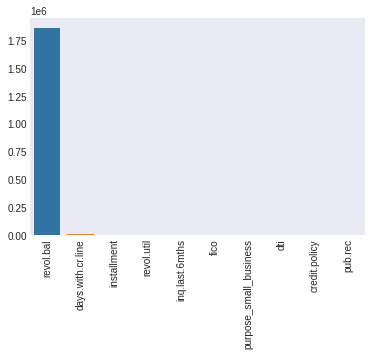

In [102]:
feat_imp = pd.Series(fit.scores_, index = x.columns)
sns.barplot(x=feat_imp.nlargest(10).index, y=feat_imp.nlargest(10))
plt.xticks(rotation=90)

In [111]:
featurescores = pd.concat([dfcolumns,dfscores],axis=1)
featurescores.columns=['Features', 'Scores']
featurescores.nlargest(10,'Scores')

,Features,Scores
7,revol.bal,1860497.94
6,days.with.cr.line,11190.78
2,installment,3211.57
8,revol.util,1160.85
9,inq.last.6mths,656.47
5,fico,435.11
18,purpose_small_business,63.91
4,dti,50.25
0,credit.policy,46.70
11,pub.rec,25.05


In [112]:
x_fs = final_df[['revol.bal', 'days.with.cr.line','installment', 'revol.util','inq.last.6mths', 'fico']]

In [113]:
x_train_fs,x_test_fs,y_train_fs, y_test_fs = train_test_split(x_fs, y, test_size=0.2, random_state=42)

In [114]:
from xgboost import XGBClassifier
xgb = XGBClassifier()

In [115]:
acc = cross_val_score(xgb,x_train_fs,y_train_fs,cv=10, scoring="accuracy")
acc

array([0.83833116, 0.83833116, 0.83289817, 0.83942559, 0.83289817,
       0.83681462, 0.84073107, 0.83942559, 0.8381201 , 0.83289817])

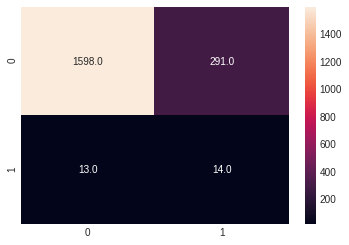

In [116]:
rfr = RandomForestClassifier()
rfr.fit(x_train_fs,y_train_fs)
y_pred_fs = rfr.predict(x_test_fs)
sns.heatmap(confusion_matrix(y_pred_fs, y_test_fs), annot=True,fmt="1.1f")


In [117]:
print(accuracy_score(y_pred_fs, y_test_fs))

0.8413361169102297
